In [99]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime


[*********************100%%**********************]  1 of 1 completed


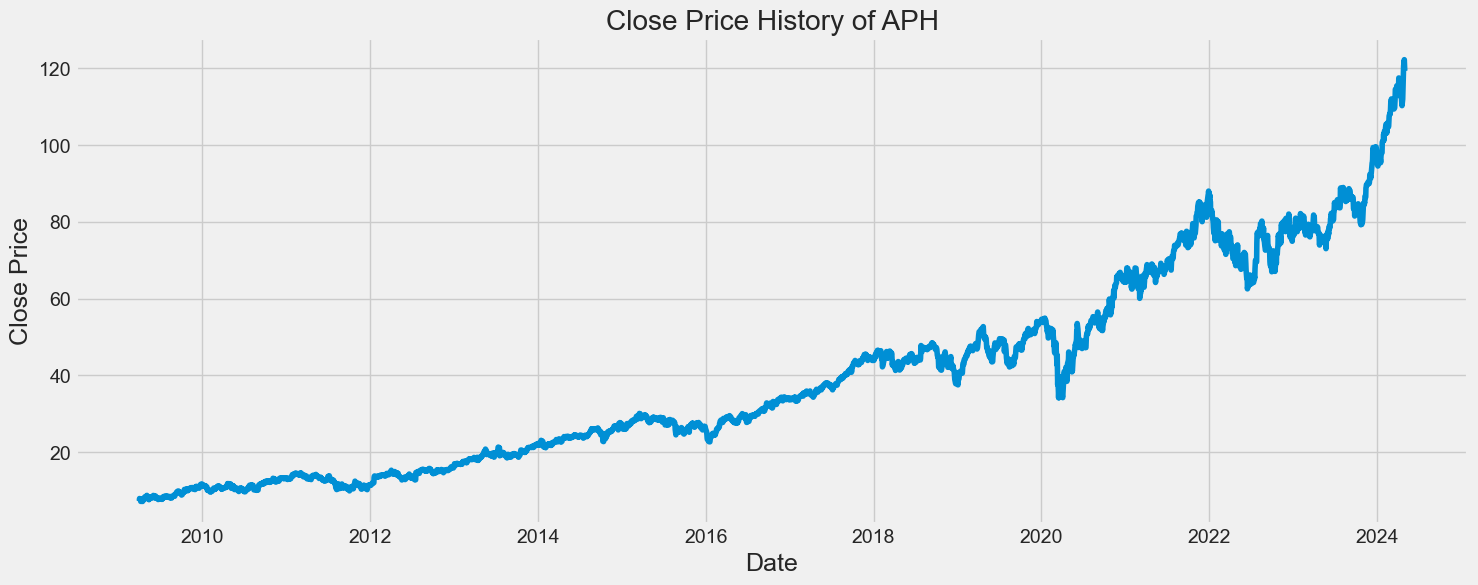

In [115]:
# Get the stock quote for APH
df = pdr.get_data_yahoo('APH', start='2009-04-01', end='2024-05-02')

# Closing prices for APH
plt.figure(figsize=(16,6))
plt.title('Close Price History of APH')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3797 entries, 2009-04-01 to 2024-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3797 non-null   float64
 1   High       3797 non-null   float64
 2   Low        3797 non-null   float64
 3   Close      3797 non-null   float64
 4   Adj Close  3797 non-null   float64
 5   Volume     3797 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 207.6 KB


All data points are complete and non-null due to the ease of the Yahoo finance API.  

In [116]:
# Create a new dataframe with only the 'Close' column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# splitting the dataset 80% for training
training_data_len = int(np.ceil( len(dataset) * .80 ))

In [117]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00141384],
       [0.00672119],
       [0.00539435],
       ...,
       [1.        ],
       [0.98816722],
       [0.97502941]])

In [103]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.41384181e-03, 6.72119074e-03, 5.39435247e-03, 5.24209316e-03,
       2.61014780e-04, 8.70035437e-05, 3.34971733e-03, 2.34915376e-03,
       2.45790923e-03, 0.00000000e+00, 5.89463426e-03, 3.74124365e-03,
       3.17570610e-03, 5.78587879e-03, 7.33023214e-03, 7.35197992e-03,
       9.89690099e-03, 8.87458134e-03, 9.15735220e-03, 1.12889909e-02,
       1.10062200e-02, 1.16152573e-02, 1.38556597e-02, 1.19415320e-02,
       1.11367316e-02, 7.63475077e-03, 7.98277324e-03, 4.98107423e-03,
       5.48135602e-03, 4.06751420e-03, 6.02514165e-03, 6.56892728e-03,
       8.93983297e-03, 1.01361597e-02, 1.03536789e-02, 7.02570522e-03,
       7.19972060e-03, 1.02231674e-02, 9.04858843e-03, 9.50537467e-03,
       1.00274042e-02, 1.36816443e-02, 1.35728889e-02, 9.96215261e-03,
       1.07669530e-02, 1.00709081e-02, 7.63475077e-03, 8.98333681e-03,
       1.11149755e-02, 1.23548061e-02, 1.12672348e-02, 9.17909997e-03,
       7.11271291e-03, 7.26497222e-03, 7.52599530e-03, 6.24265673e-03,
     

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input  

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model, past 10 Epochs, model doesn't really improve worthy of the processing power
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10


C:\Users\Greg\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2978/2978 ━━━━━━━━━━━━━━━━━━━━ 54s 17ms/step - loss: 6.0575e-04
Epoch 2/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 1.2941e-04
Epoch 3/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 17ms/step - loss: 2.1766e-04
Epoch 4/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 17ms/step - loss: 9.1320e-05
Epoch 5/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - loss: 6.7983e-05
Epoch 6/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - loss: 8.3453e-05
Epoch 7/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 5.3939e-05
Epoch 8/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 5.4168e-05
Epoch 9/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 5.3558e-05
Epoch 10/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 5.6589e-05


In [110]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


2.932389373750245

C:\Users\Greg\AppData\Local\Temp\ipykernel_27804\431445187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


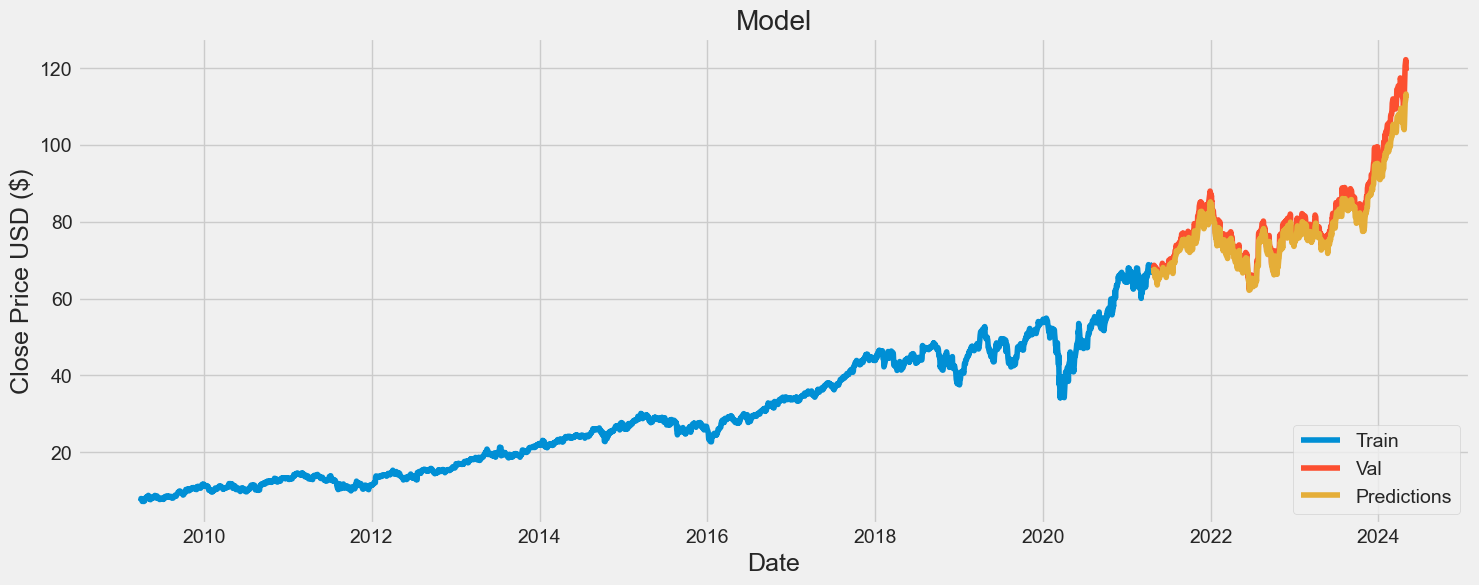

In [111]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [113]:
# Provides they day's close price vs the predicted close price and the Percent error between the two.
for i in valid['Close']:
    valid['Diff']= ((valid['Predictions']-valid['Close'])/valid['Close'])*100
valid

C:\Users\Greg\AppData\Local\Temp\ipykernel_27804\1539365895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff']= ((valid['Predictions']-valid['Close'])/valid['Close'])*100


,Close,Predictions,Diff
Date,,,
2021-04-27,68.260002,67.959381,-0.440406
2021-04-28,67.519997,67.296471,-0.331052
2021-04-29,68.639999,66.594208,-2.980466
2021-04-30,67.339996,67.584541,0.363150
2021-05-03,66.250000,66.496956,0.372764
...,...,...,...
2024-04-25,119.010002,108.800629,-8.578584
2024-04-26,120.489998,110.844017,-8.005628
2024-04-29,122.129997,111.994225,-8.299167
